# Bank Term Analysis in Python

In this notebook we will explore the Bank Marketing dataset from the UCI Machine Learning Repository.

We will be doing some exploratory analysis and then creating a Classification Model to predict 
whether a client will subscribe a bank term deposit.

## The Data

This dataset contains 20 bank client data attributes and whether the client subscribed to a term deposit.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('bank-additional-full.csv', delimiter=';')

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Exploratory Data Analysis

We begin by exploring the data to see which attributes are most influential for a bank term subscription.

### Numerical Attributes

Let's edit **y** to be an *int* in order to analyse the highest correlative numerical attributes.

In [5]:
data['y'] = data['y'].map(lambda x:0 if x == 'no' else 1)

In [6]:
numerical = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericData = data.select_dtypes(numerical)

<Axes: >

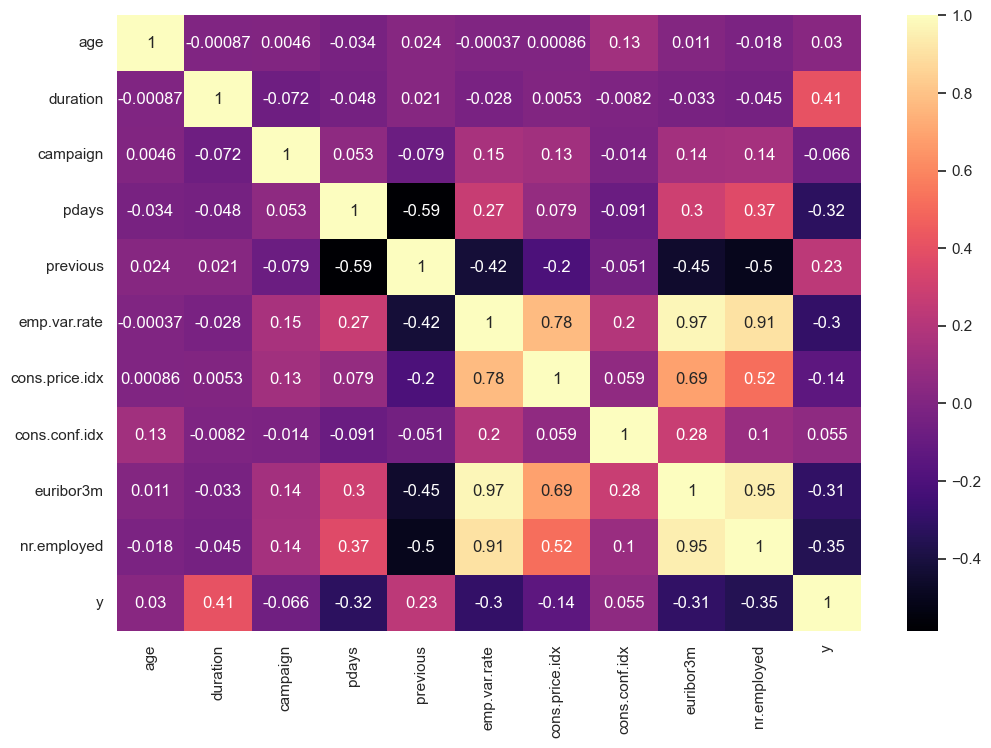

In [7]:
sns.set(rc={'figure.figsize':(12,8)})

sns.heatmap(numericData.corr(),cmap='magma',annot=True)

In [8]:
numericData.corr()['y'].sort_values()

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
campaign         -0.066357
age               0.030399
cons.conf.idx     0.054878
previous          0.230181
duration          0.405274
y                 1.000000
Name: y, dtype: float64

The highest correlating attribute to subscribing for a bank term deposit:
- **duration**: the duration of the last contact

However, it can be discarded: if 0 duration, they did not sign up; if longer duration, they took longer in order to sign up.

In [9]:
data.drop(columns=['duration'],inplace=True)

The next highest: 
- **previous**: the number of contacts performed before contacting this client, 
- as well as the **cons.conf.indx** (consumer confidence index): the level of optimism among consumers regarding the state of the economy.

In contrast, the largest negative correlations: 
- **nr.employed**: the employment rate at the time of contacting
- as well as **pdays**: the number of days since last contacting the client

### Now we explore the categorical attributes:

<Axes: xlabel='age', ylabel='count'>

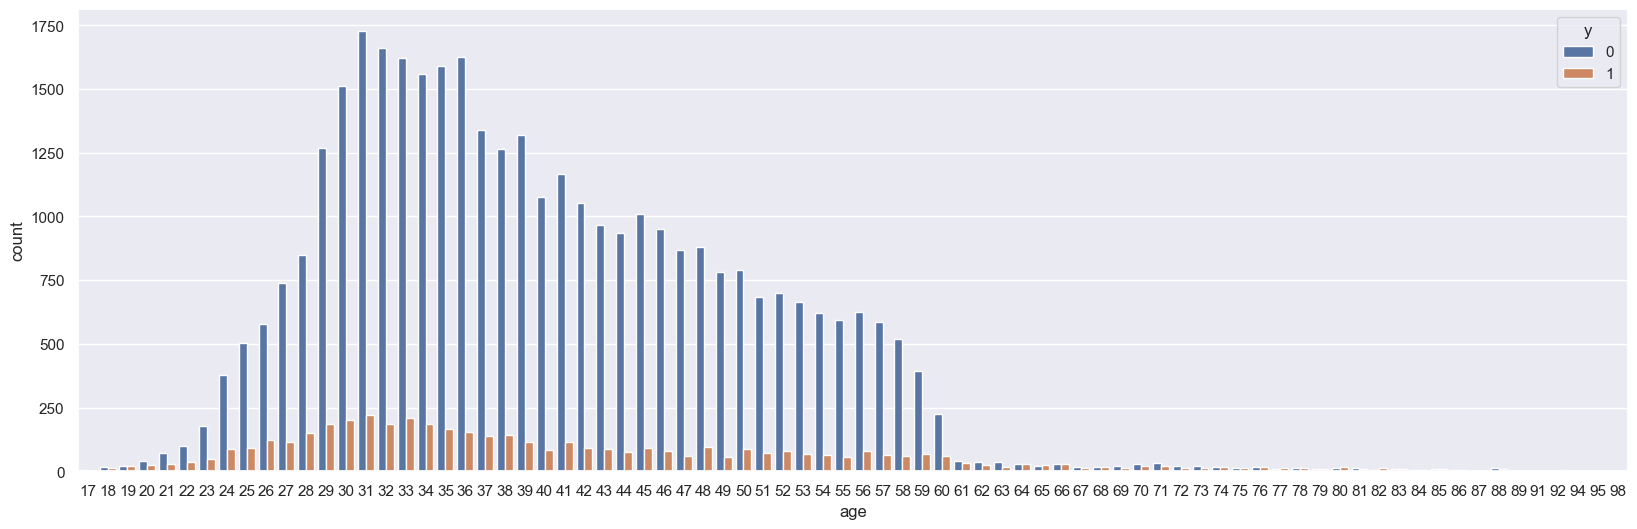

In [10]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(data,x='age',hue='y')

- Most subscribing clients are within the ages of 24 and 60.

<Axes: xlabel='age'>

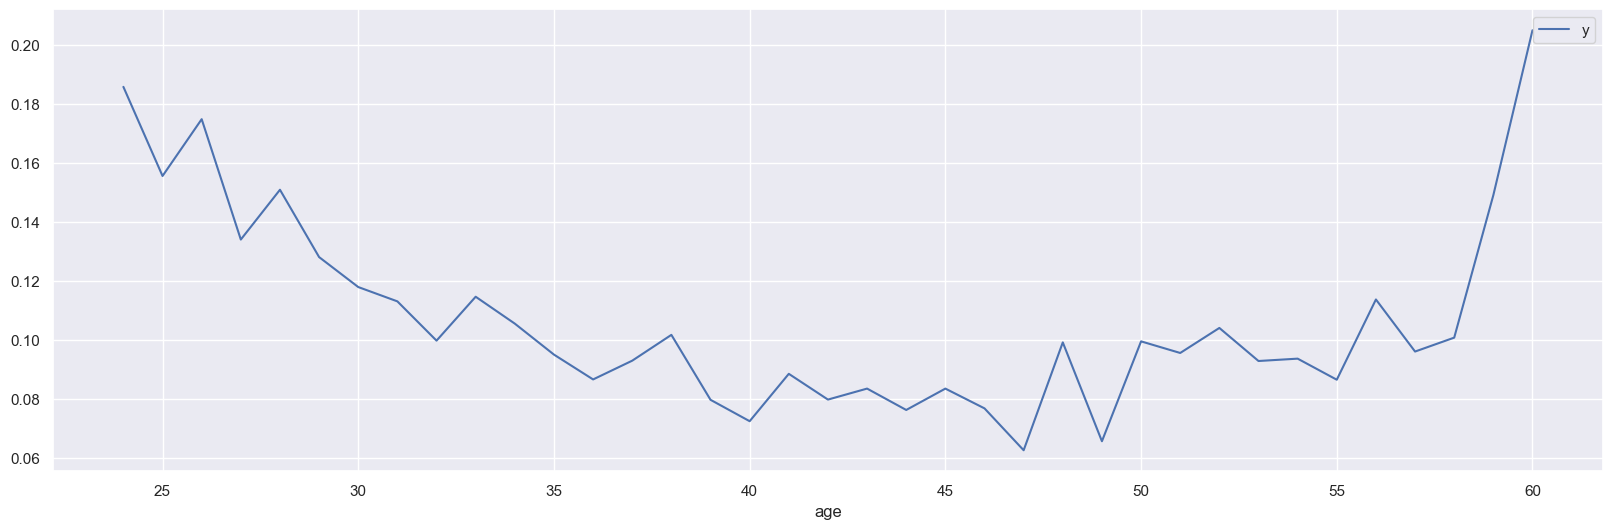

In [11]:
ageData = data[['age','y']]

allAgeData = ageData.groupby('age').count()
subAgeData = ageData[ageData['y'] ==1].groupby('age').count()

agePercentage = (subAgeData/allAgeData)

agePercentage[7:44].plot()

- Between the ages of 30 and 34, we get the largest amount of clients as well as largest percentage subscribed.

<Axes: xlabel='education', ylabel='count'>

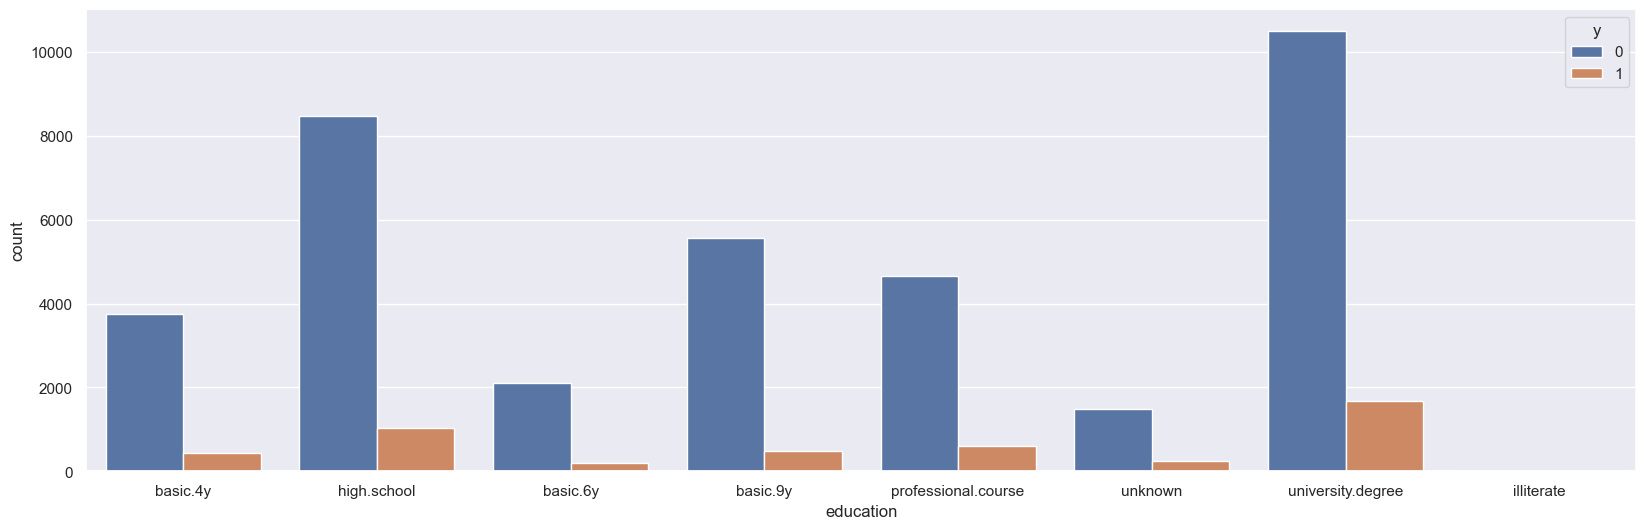

In [12]:
sns.countplot(data,x='education',hue='y')

- Most subscribing clients have a university degree

<Axes: xlabel='job', ylabel='count'>

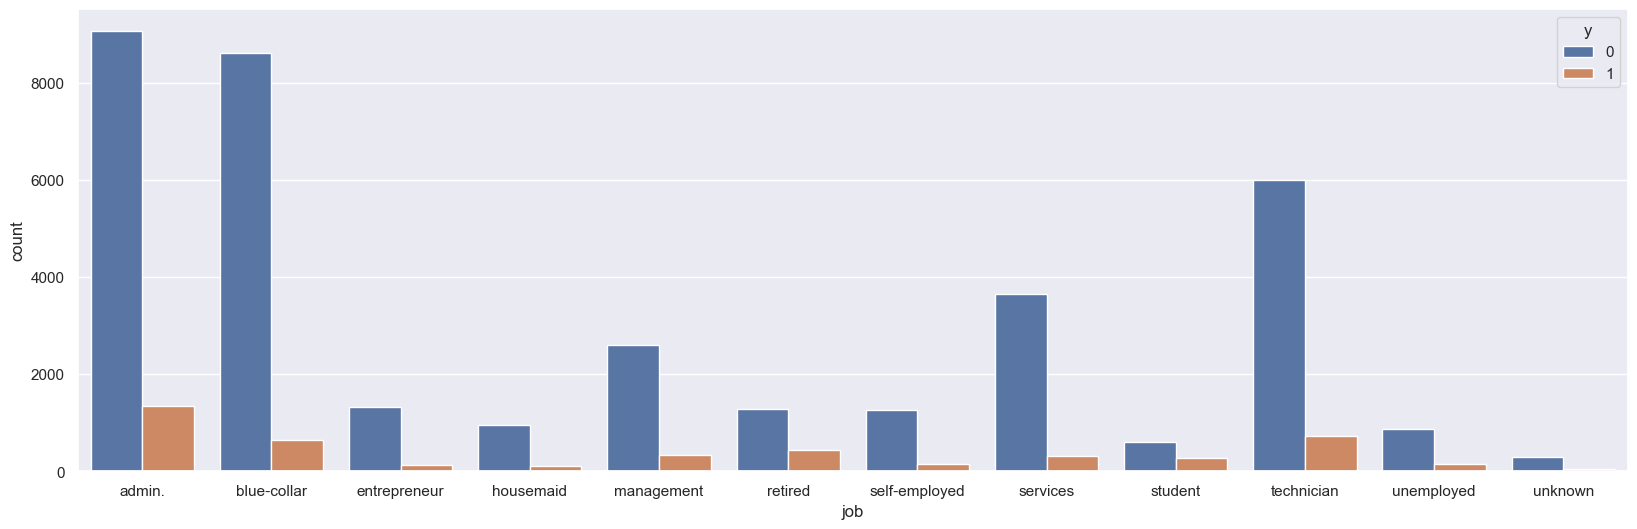

In [13]:
sns.countplot(data.sort_values(by='job'),x='job',hue='y')

- Most subscribing clients have admin, blue-collar, or technician jobs.

#### Other attributes that provide context:

<Axes: xlabel='marital', ylabel='count'>

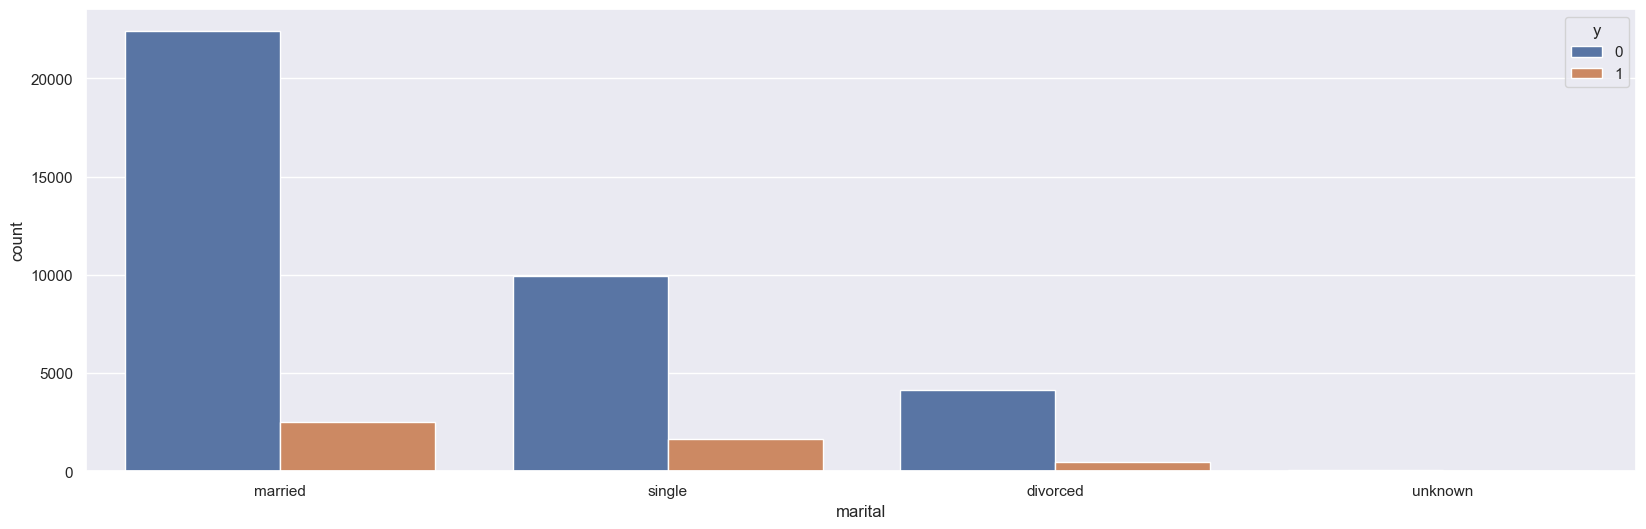

In [14]:
sns.countplot(data,x='marital',hue='y')

<Axes: xlabel='default', ylabel='count'>

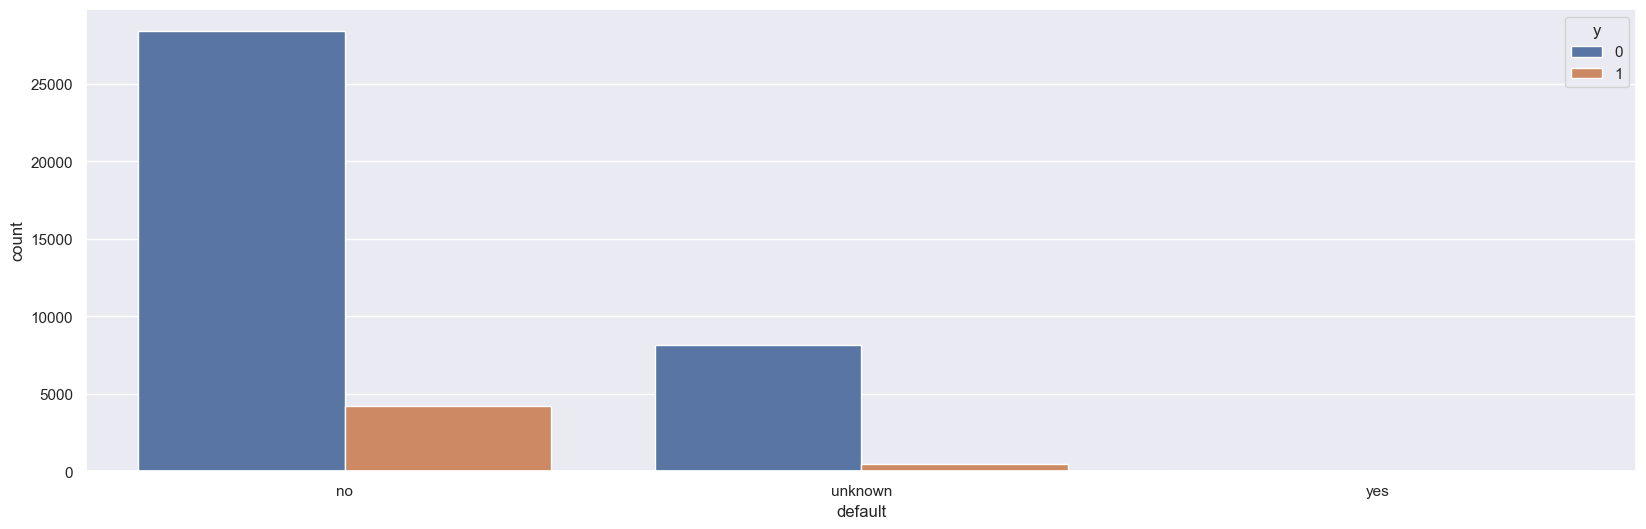

In [15]:
sns.countplot(data,x='default',hue='y')

<Axes: xlabel='housing', ylabel='count'>

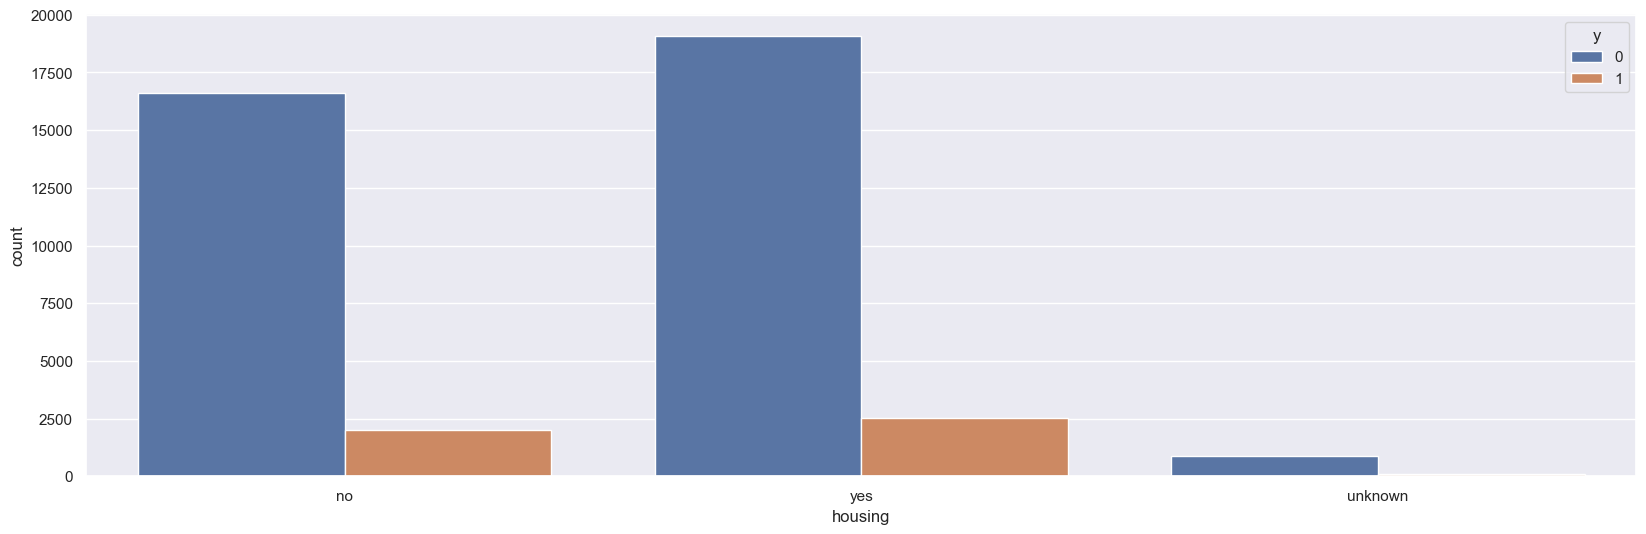

In [16]:
sns.countplot(data,x='housing',hue='y')

<Axes: xlabel='loan', ylabel='count'>

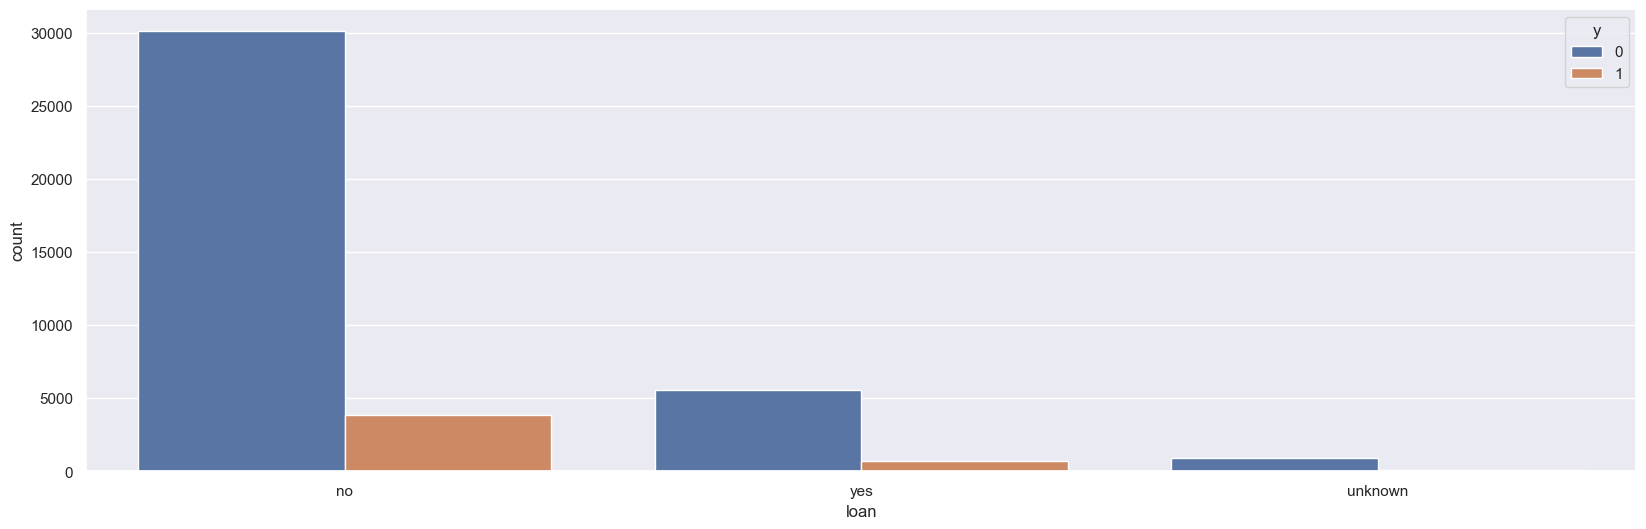

In [17]:
sns.countplot(data,x='loan',hue='y')

For brevity, we will omit the analysis of attributes **contact**, **month**, and **day_of_week** which are not influential attributes and will be dropping these from the dataset.

In [18]:
data.drop(columns=['contact','month','day_of_week'],inplace=True)

## Data Cleaning & Preparation

Prior to training our model, we need to clean and prep the data.

We start by **removing any duplicates**.

In [19]:
len(data)

41188

In [20]:
data.drop_duplicates(inplace=True)

In [21]:
len(data)

38765

Next, we **handle missing data**.

<Axes: >

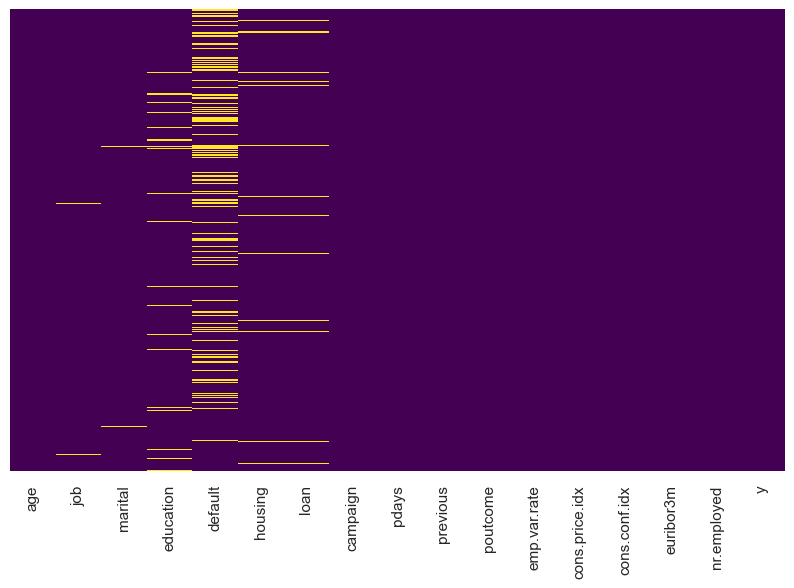

In [22]:
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(data.apply(lambda x: x=='unknown'),yticklabels=False,cbar=False,cmap='viridis')

- Attributes with missing values are **job**, **marital**, **education**, **default**, **housing** and **loan**.

In [23]:
data['y'].value_counts()

0    34173
1     4592
Name: y, dtype: int64

- We have an imbalanced dataset with far less subscribing client data than non-subscribing. Thus, we would like to drop as little 'yes' cases as possible.

In [24]:
subset = data[['housing','loan','default','y']]
subYes = subset[subset['y'] == 1]

s1 =subYes['housing'].value_counts()
s2 = subYes['loan'].value_counts()
s3 = subYes['default'].value_counts()
pd.concat([s1,s2,s3],axis=1)

,housing,loan,default
yes,2474,682,NaN
no,2011,3803,4150.0
unknown,107,107,442.0


- For **housing** and **loan**, we will make an assumtion and set any 'unknown' values to 'no'.
- For **default**, there are no 'yes' cases, so we can simply drop the entire attribute.

In [25]:
data['housing'] = data['housing'].apply(lambda x: 'no' if x == 'unknown' else x)
data['loan'] = data['loan'].apply(lambda x: 'no' if x == 'unknown' else x)

In [26]:
data.drop(columns=['default'],inplace=True)

In [27]:
subset = data[['marital','y']]
subYes = subset[subset['y'] == 1]
subYes.value_counts()

marital   y
married   1    2514
single    1    1594
divorced  1     472
unknown   1      12
dtype: int64

<Axes: xlabel='age', ylabel='count'>

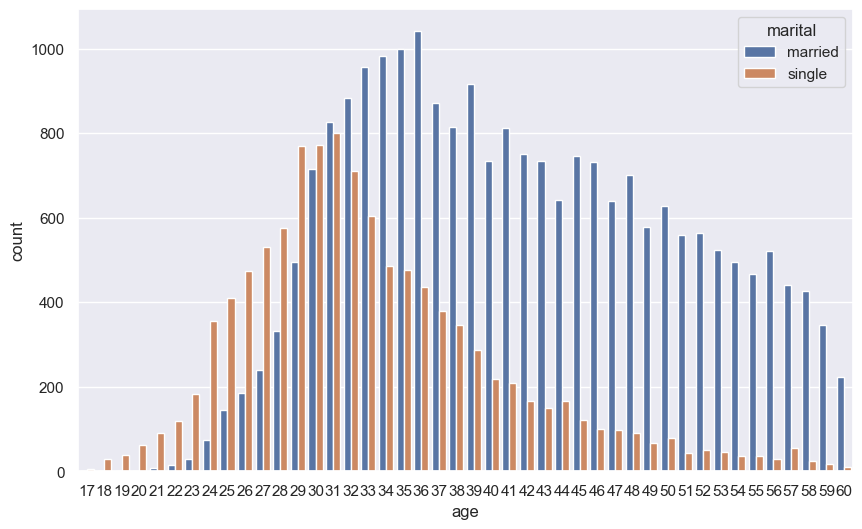

In [28]:
sns.countplot(data[(data['marital'] != 'unknown') & (data['marital'] != 'divorced') & (data['age'] <=60)],x='age',hue='marital')

- For **marital**, if the client is over 30, we set any 'unknown' to married.

In [29]:
def handle_marital(marital,age):
    if marital == 'unknown':
        return 'married' if age >30 else 'single'
    else:
        return marital
    
data['marital'] = data.apply(lambda x: handle_marital(x['marital'],x['age']),axis=1)

In [30]:
len(data[data['education'] =='unknown'])

1669

In [31]:
len(data[data['job'] =='unknown'])

323

- There are more missing education values than jobs.

<Axes: xlabel='job', ylabel='count'>

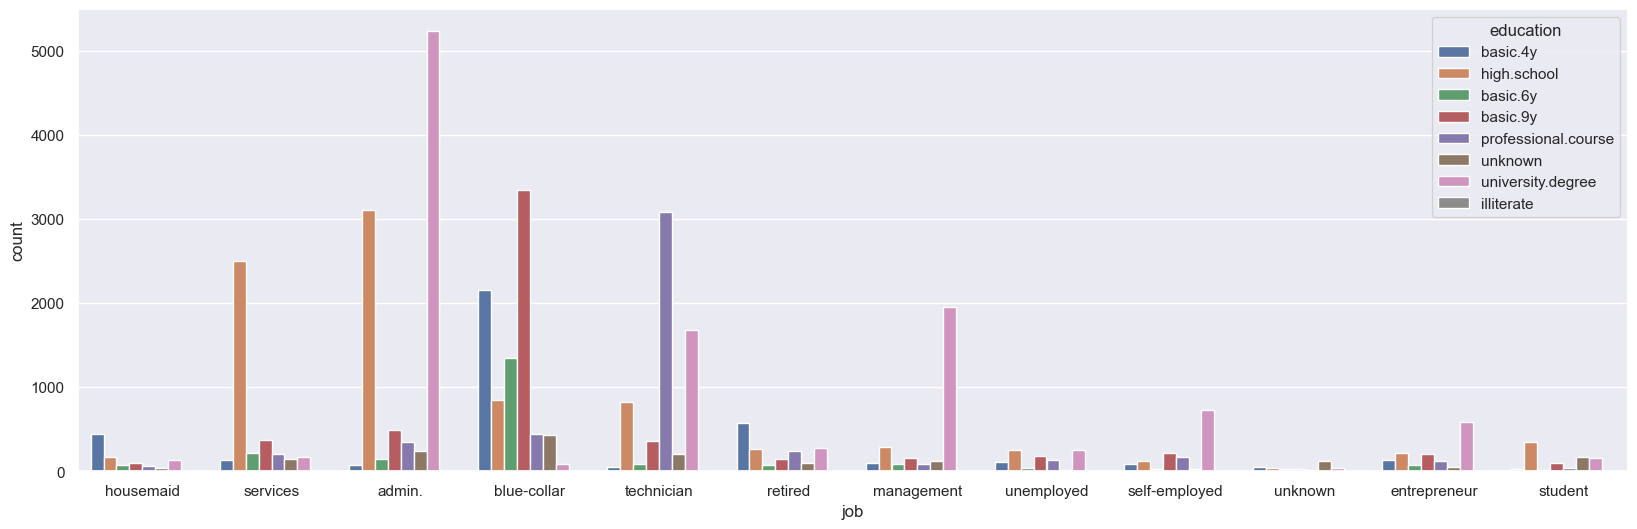

In [32]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(data,x='job',hue='education')

- We can drop any unknown **job** values, and use a client's job to fill their **education**.

In [33]:
data = data[data['job'] != 'unknown']

In [34]:
subData = data[['job','education']].groupby(by='job').value_counts()
subData = subData.reset_index()
subData.columns = ['job','education','count']

In [35]:
subData.iloc[subData.groupby('job')['count'].idxmax()]

,job,education,count
0,admin.,university.degree,5238
8,blue-collar,basic.9y,3343
16,entrepreneur,university.degree,581
24,housemaid,basic.4y,445
32,management,university.degree,1957
39,retired,basic.4y,576
47,self-employed,university.degree,735
55,services,high.school,2506
62,student,high.school,348
69,technician,professional.course,3083


In [36]:
def fill_edu(education,job):
    eduFiller = {
        'admin.': 'university.degree',
        'blue-collar':'basic.9y',
        'entrepreneur':'university.degree',
        'housemaid': 'basic.4y',
        'management':'university.degree',
        'retired':'basic.4y',
        'self-employed':'university.degree',
        'services':'high.school',
        'student': 'high.school',
        'technician': 'professional.course',
        'unemployed':'university.degree'
    }
    
    if education == 'unknown':
        return eduFiller[job]
    else:
        return education
    
data['education'] = data.apply(lambda x:fill_edu(x['education'],x['job']),axis=1)

### Converting Categorical Features

- Since we will already be creating many dummy variables for some of these categorical figures, we can condense **poutcome**.

In [37]:
data['poutcome'] = data['poutcome'].apply(lambda x: 'unsuccessful'  if x == 'nonexistent' or x == 'failure' else 'success')

In [38]:
job = pd.get_dummies(data['job'],drop_first=True)
marital = pd.get_dummies(data['marital'],drop_first=True)
education = pd.get_dummies(data['education'],drop_first=True)
housing = pd.get_dummies(data['housing'],drop_first=True)
loan = pd.get_dummies(data['loan'],drop_first=True)
poutcome = pd.get_dummies(data['poutcome'],drop_first=True)

In [39]:
data.drop(['job','marital','education','housing','loan','poutcome'],axis=1,inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38442 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38442 non-null  int64  
 1   campaign        38442 non-null  int64  
 2   pdays           38442 non-null  int64  
 3   previous        38442 non-null  int64  
 4   emp.var.rate    38442 non-null  float64
 5   cons.price.idx  38442 non-null  float64
 6   cons.conf.idx   38442 non-null  float64
 7   euribor3m       38442 non-null  float64
 8   nr.employed     38442 non-null  float64
 9   y               38442 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 3.2 MB


In [41]:
data['y'].value_counts()

0    33886
1     4556
Name: y, dtype: int64

### Balancing the Dataset

Next we will balance the dataset.

For this project, we will undersample the non-subscribing data to avoid overfitting the model.

In [42]:
balancedData = data[data['y'] == 0].sample(4556)
balancedData = pd.concat([balancedData, data[data['y'] == 1]])
balancedData['y'].value_counts()

0    4556
1    4556
Name: y, dtype: int64

## Creating a Classification Model

The final step for this project is to create a classification model to predict whether a client will subscribe to a bank term.

### Splitting data into Train & Test sets

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(balancedData.drop('y',axis=1), balancedData['y'], test_size=0.33, random_state=101)

### Scaling the Data

Since some of the attributes hold wide varying values, we will scale the data to balance the impact of the values
and improve the performance of the model.

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Training the Model

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression(max_iter = 600)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

### Evaluating the Model

Now that we have created the model, we will evaluate it by way of a classification report, confusion matrix and taking a look at the area under the ROC curve.

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1491
           1       0.73      0.71      0.72      1516

    accuracy                           0.72      3007
   macro avg       0.72      0.72      0.72      3007
weighted avg       0.72      0.72      0.72      3007



In [51]:
confusion_matrix(y_test,predictions)

array([[1092,  399],
       [ 439, 1077]], dtype=int64)

Our model performed with 72% accuracy.

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score

In [53]:
fpr,tpr,_ = roc_curve(y_test,predictions)
auc= roc_auc_score(y_test,predictions)

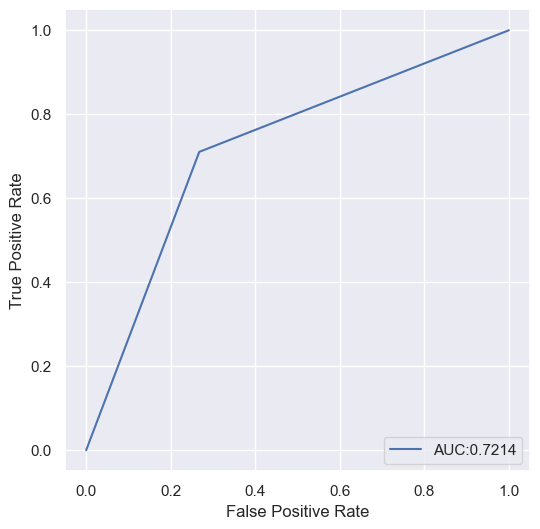

In [54]:
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label=f"AUC:{round(auc,4)}")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()